# **Sentiment Analysis of Medibank**


## Installing the Libraries

In [ ]:
# Installing required libraries

# Install pyLDAvis library for interactive topic visualization dashboard.
!pip install pyLDAvis


## Loading the Libraries

In [ ]:
# Loading primary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# For text processing
import re
from textblob import TextBlob
import gensim
import logging
import tempfile
from gensim import corpora, models, similarities
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.gensim_models

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Loading the dataset
df = pd.read_csv("Dataset 1 - Medibank.csv")
df.head(5)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,created_at,date,time,username,name,tweet,language,hashtags
0,1513321640431550474,2022-04-11 01:02:49+00:00,2022-04-11,01:02:49,parkesstreet,Bernie Cox,@AustralianLabor After the Fraser Government d...,en,[]
1,1513303462796271616,2022-04-10 23:50:36+00:00,2022-04-10,23:50:36,shanebakeract,Shane Baker,@LuckiePhil1 @vince05656201 @LiberalAus Actual...,en,[]
2,1513285115522457600,2022-04-10 22:37:41+00:00,2022-04-10,22:37:41,pceebee23,ceebee23,@kels_316 @AustralianLabor to be fair to both ...,en,[]
3,1513254396989108226,2022-04-10 20:35:37+00:00,2022-04-10,20:35:37,russputin2,"Russell Drysdale # IStandbyDan, Louise &Brittany","@GregHuntMP Actually Greg, Labor invented the ...",en,[]
4,1513127072264519686,2022-04-10 12:09:41+00:00,2022-04-10,12:09:41,gabrielschind13,Gab,@Rheenie_85 So we don't have education for all...,en,[]


In [ ]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21067 entries, 0 to 21066
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          21067 non-null  object
 1   created_at  21067 non-null  object
 2   date        21067 non-null  object
 3   time        21063 non-null  object
 4   username    21063 non-null  object
 5   name        21063 non-null  object
 6   tweet       21063 non-null  object
 7   language    21059 non-null  object
 8   hashtags    21059 non-null  object
dtypes: object(9)
memory usage: 1.4+ MB


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Preliminary Analysis

In [ ]:
# Creating a duplicate dataframe
df_medibank = df
df_medibank

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,created_at,date,time,username,name,tweet,language,hashtags
0,1513321640431550474,2022-04-11 01:02:49+00:00,2022-04-11,01:02:49,parkesstreet,Bernie Cox,@AustralianLabor After the Fraser Government d...,en,[]
1,1513303462796271616,2022-04-10 23:50:36+00:00,2022-04-10,23:50:36,shanebakeract,Shane Baker,@LuckiePhil1 @vince05656201 @LiberalAus Actual...,en,[]
2,1513285115522457600,2022-04-10 22:37:41+00:00,2022-04-10,22:37:41,pceebee23,ceebee23,@kels_316 @AustralianLabor to be fair to both ...,en,[]
3,1513254396989108226,2022-04-10 20:35:37+00:00,2022-04-10,20:35:37,russputin2,"Russell Drysdale # IStandbyDan, Louise &Brittany","@GregHuntMP Actually Greg, Labor invented the ...",en,[]
4,1513127072264519686,2022-04-10 12:09:41+00:00,2022-04-10,12:09:41,gabrielschind13,Gab,@Rheenie_85 So we don't have education for all...,en,[]
...,...,...,...,...,...,...,...,...,...
21062,815671452896784384,2017-01-01 21:30:03+00:00,2017-01-01,21:30:03,medibank,Medibank,Simple tricks to make your plane ride more com...,en,"['travel', 'holiday']"
21063,815526386689404928,2017-01-01 11:53:36+00:00,2017-01-01,11:53:36,nyafururin,inactive,"Medibank is weird, like- where is my colour wh...",en,[]
21064,815419270611935232,2017-01-01 04:47:58+00:00,2017-01-01,04:47:58,donno79,Andrew Donnison,Why is Brett Lee batting in the 2nd @medibank ...,en,['bigquestions']
21065,815399667819315201,2017-01-01 03:30:04+00:00,2017-01-01,03:30:04,medibank,Medibank,The #detox recipe that will help you feel bran...,en,"['detox', 'happynewyear']"


In [ ]:
# Counting the number of words in each sentence
# Assigning the word count to a new attribute named 'word_count'

def word_counter(document):
  split_word = str(document).split(" ") # split by white space
  word_count = len(split_word) # count the words
  return word_count

df_medibank['word_count_function'] = df_medibank['tweet'].apply(word_counter)
df_medibank

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,created_at,date,time,username,name,tweet,language,hashtags,word_count_function
0,1513321640431550474,2022-04-11 01:02:49+00:00,2022-04-11,01:02:49,parkesstreet,Bernie Cox,@AustralianLabor After the Fraser Government d...,en,[],26
1,1513303462796271616,2022-04-10 23:50:36+00:00,2022-04-10,23:50:36,shanebakeract,Shane Baker,@LuckiePhil1 @vince05656201 @LiberalAus Actual...,en,[],21
2,1513285115522457600,2022-04-10 22:37:41+00:00,2022-04-10,22:37:41,pceebee23,ceebee23,@kels_316 @AustralianLabor to be fair to both ...,en,[],52
3,1513254396989108226,2022-04-10 20:35:37+00:00,2022-04-10,20:35:37,russputin2,"Russell Drysdale # IStandbyDan, Louise &Brittany","@GregHuntMP Actually Greg, Labor invented the ...",en,[],48
4,1513127072264519686,2022-04-10 12:09:41+00:00,2022-04-10,12:09:41,gabrielschind13,Gab,@Rheenie_85 So we don't have education for all...,en,[],22
...,...,...,...,...,...,...,...,...,...,...
21062,815671452896784384,2017-01-01 21:30:03+00:00,2017-01-01,21:30:03,medibank,Medibank,Simple tricks to make your plane ride more com...,en,"['travel', 'holiday']",15
21063,815526386689404928,2017-01-01 11:53:36+00:00,2017-01-01,11:53:36,nyafururin,inactive,"Medibank is weird, like- where is my colour wh...",en,[],13
21064,815419270611935232,2017-01-01 04:47:58+00:00,2017-01-01,04:47:58,donno79,Andrew Donnison,Why is Brett Lee batting in the 2nd @medibank ...,en,['bigquestions'],24
21065,815399667819315201,2017-01-01 03:30:04+00:00,2017-01-01,03:30:04,medibank,Medibank,The #detox recipe that will help you feel bran...,en,"['detox', 'happynewyear']",15


In [ ]:
# Counting the number of characters in each sentence
# Assigning the character count to a new attribute named 'char_count'

df_medibank['char_count'] = df_medibank['tweet'].str.len()  # Includes the spaces
df_medibank.head(5)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,created_at,date,time,username,name,tweet,language,hashtags,word_count_function,char_count
0,1513321640431550474,2022-04-11 01:02:49+00:00,2022-04-11,01:02:49,parkesstreet,Bernie Cox,@AustralianLabor After the Fraser Government d...,en,[],26,190.0
1,1513303462796271616,2022-04-10 23:50:36+00:00,2022-04-10,23:50:36,shanebakeract,Shane Baker,@LuckiePhil1 @vince05656201 @LiberalAus Actual...,en,[],21,150.0
2,1513285115522457600,2022-04-10 22:37:41+00:00,2022-04-10,22:37:41,pceebee23,ceebee23,@kels_316 @AustralianLabor to be fair to both ...,en,[],52,307.0
3,1513254396989108226,2022-04-10 20:35:37+00:00,2022-04-10,20:35:37,russputin2,"Russell Drysdale # IStandbyDan, Louise &Brittany","@GregHuntMP Actually Greg, Labor invented the ...",en,[],48,297.0
4,1513127072264519686,2022-04-10 12:09:41+00:00,2022-04-10,12:09:41,gabrielschind13,Gab,@Rheenie_85 So we don't have education for all...,en,[],22,132.0


In [ ]:
# Calculating the average number of words in the tweet column
def avg_word(Sentence):
  if isinstance(Sentence, str):
    words = Sentence.split() # split the sentence into words
    avg_of_words = (sum(len(word) for word in words)/len(words))
    return avg_of_words
  else:
    return 0

df_medibank['avg_word'] = df_medibank['tweet'].apply(avg_word)
df_medibank.head(5)

## Text Pre Processing

### Tranforming to Lowercase

In [ ]:
# Tranforming all the text to lowercase

df_medibank['tweet'] = df_medibank['tweet'].str.lower()
df_medibank.head()

### Checking for Duplicates

In [ ]:
# Check duplicate tweets count
duplicate_count = len(df_medibank['tweet'])-len(df_medibank['tweet'].drop_duplicates())
print('duplicate count:', duplicate_count)
print('total records before remove duplicates:', df_medibank.shape[0])


duplicate count: 191
total records before remove duplicates: 21067


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Removing the Duplicates

In [ ]:
# Dropping duplicates (keep the last tweet of each of the duplicates)
df_medibank = df_medibank.drop_duplicates(subset='tweet', keep="first")
print('updated record count:', df_medibank.shape[0])

updated record count: 20876


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Removing Punctuation and Twitter IDs

In [ ]:
# Remove punctuations
df_medibank['tweet'] = df_medibank['tweet'].str.replace('[^\w\s]','')
df_medibank.head()

In [ ]:
# Remove twitter user ids that are mentioned in the tweet text

def remove_twitter_ids(tweet):
  mention_removed_tweet = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", str(tweet)) # remove any sequence of characters followed by '@' sign
  spaces_removed = re.sub(r"\s\s+", " ", str(mention_removed_tweet)) # remove multiple spaces
  return spaces_removed

df_medibank['tweet'] = df_medibank['tweet'].apply(remove_twitter_ids)
df_medibank.head()

### Removing Digits

In [ ]:
def remove_digits(sent):
  return " ".join(w for w in sent.split() if not w.isdigit())

df_medibank['tweet'] = df_medibank['tweet'].apply(remove_digits)
df_medibank.head(5)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-181-007b88c4a94e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medibank['tweet'] = df_medibank['tweet'].apply(remove_digits)


,id,created_at,date,time,username,name,tweet,language,hashtags,word_count_function,char_count,avg_word
0,1513321640431550474,2022-04-11 01:02:49+00:00,2022-04-11,01:02:49,parkesstreet,Bernie Cox,australianlabor after the fraser government de...,en,[],26,190.0,6.600000
1,1513303462796271616,2022-04-10 23:50:36+00:00,2022-04-10,23:50:36,shanebakeract,Shane Baker,luckiephil1 vince05656201 liberalaus actually ...,en,[],21,150.0,6.190476
2,1513285115522457600,2022-04-10 22:37:41+00:00,2022-04-10,22:37:41,pceebee23,ceebee23,kels316 australianlabor to be fair to both gre...,en,[],52,307.0,4.923077
3,1513254396989108226,2022-04-10 20:35:37+00:00,2022-04-10,20:35:37,russputin2,"Russell Drysdale # IStandbyDan, Louise &Brittany",greghuntmp actually greg labor invented the pb...,en,[],48,297.0,5.208333
4,1513127072264519686,2022-04-10 12:09:41+00:00,2022-04-10,12:09:41,gabrielschind13,Gab,rheenie85 so we dont have education for all or...,en,[],22,132.0,5.285714


### Removing Stop Words

In [ ]:
# Remove stop words

# Load NLTK library
import nltk

# Download the stopwords to the nltk library
nltk.download('stopwords')

# Load the stopwords
from nltk.corpus import stopwords

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# get the list of all stopwords from the library
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
stop.remove('not')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Remove the words in 'stop' list
def remove_stop_words(tweet):
  tokens = tweet.split()
  stop_removed_tokens = [t for t in tokens if t not in stop]
  convert_to_string = " ".join(stop_removed_tokens)
  return convert_to_string

df_medibank['tweet'] = df_medibank['tweet'].apply(remove_stop_words)
df_medibank.head(5)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-185-6b042d759421>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medibank['tweet'] = df_medibank['tweet'].apply(remove_stop_words)


,id,created_at,date,time,username,name,tweet,language,hashtags,word_count_function,char_count,avg_word
0,1513321640431550474,2022-04-11 01:02:49+00:00,2022-04-11,01:02:49,parkesstreet,Bernie Cox,australianlabor fraser government destroyed or...,en,[],26,190.0,6.600000
1,1513303462796271616,2022-04-10 23:50:36+00:00,2022-04-10,23:50:36,shanebakeract,Shane Baker,luckiephil1 vince05656201 liberalaus actually ...,en,[],21,150.0,6.190476
2,1513285115522457600,2022-04-10 22:37:41+00:00,2022-04-10,22:37:41,pceebee23,ceebee23,kels316 australianlabor fair greens labor prob...,en,[],52,307.0,4.923077
3,1513254396989108226,2022-04-10 20:35:37+00:00,2022-04-10,20:35:37,russputin2,"Russell Drysdale # IStandbyDan, Louise &Brittany",greghuntmp actually greg labor invented pbs ye...,en,[],48,297.0,5.208333
4,1513127072264519686,2022-04-10 12:09:41+00:00,2022-04-10,12:09:41,gabrielschind13,Gab,rheenie85 dont education medibank medicare nbn...,en,[],22,132.0,5.285714


### Stemming

In [ ]:
from nltk.stem import PorterStemmer

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# using stemming to standardize tweets
stemmer = PorterStemmer()

def stemming_function(sent):
  word_list = sent.split()
  stemmed_word_list = [stemmer.stem(word) for word in word_list]
  stemmed_sentence = " ".join(stemmed_word_list)
  return stemmed_sentence

df_medibank['tweet_stemmed'] = df_medibank['tweet'].apply(stemming_function)
df_medibank.head(10)

### Lemmatization

In [ ]:
# Download wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmtizer = WordNetLemmatizer()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# use lemmatization to standardize tweets
def lemmatize_function(sent):
  word_list = sent.split()
  lemma_word_list = [lemmtizer.lemmatize(word) for word in word_list]
  lemma_sentence = " ".join(lemma_word_list)
  return lemma_sentence

df_medibank['tweet_lemmatized'] = df_medibank['tweet'].apply(lemmatize_function)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-190-c1977aa00ab9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medibank['tweet_lemmatized'] = df_medibank['tweet'].apply(lemmatize_function)


In [ ]:
# Display original Tweet, stemmed Tweet and lemmatized Tweet
df_medibank[['tweet', 'tweet_stemmed', 'tweet_lemmatized']].head(10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet,tweet_stemmed,tweet_lemmatized
0,australianlabor fraser government destroyed or...,australianlabor fraser govern destroy origin m...,australianlabor fraser government destroyed or...
1,luckiephil1 vince05656201 liberalaus actually ...,luckiephil1 vince05656201 liberalau actual whi...,luckiephil1 vince05656201 liberalaus actually ...
2,kels316 australianlabor fair greens labor prob...,kels316 australianlabor fair green labor probl...,kels316 australianlabor fair green labor probl...
3,greghuntmp actually greg labor invented pbs ye...,greghuntmp actual greg labor invent pb year ag...,greghuntmp actually greg labor invented pb yea...
4,rheenie85 dont education medibank medicare nbn...,rheenie85 dont educ medibank medicar nbn slow ...,rheenie85 dont education medibank medicare nbn...
5,medibank waiting period httpstcowjatlcqo4n,medibank wait period httpstcowjatlcqo4n,medibank waiting period httpstcowjatlcqo4n
6,newtonmark kels316 frankly amazing quickly ent...,newtonmark kels316 frankli amaz quickli entir ...,newtonmark kels316 frankly amazing quickly ent...
7,slow metabolism cause weight gain medibank eas...,slow metabol caus weight gain medibank east el...,slow metabolism cause weight gain medibank eas...
8,jjkale2 free university tafe medibank opposed ...,jjkale2 free univers tafe medibank oppos vietn...,jjkale2 free university tafe medibank opposed ...
9,richardmarlesmp labor always party focused hea...,richardmarlesmp labor alway parti focus health...,richardmarlesmp labor always party focused hea...


## Word Frequency Analysis

In [ ]:
# Create a word frequency series. (This is a pandas series)
word_frequency = pd.Series(' '.join(df_medibank['tweet']).split()).value_counts()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Top 10 Common Words

In [ ]:
# Look at the top 10 words
word_frequency[:10]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


medibank     17954
health        3766
private       2609
amp           1913
not           1833
medicare      1776
us            1690
insurance     1677
hi            1361
get           1183
dtype: int64

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


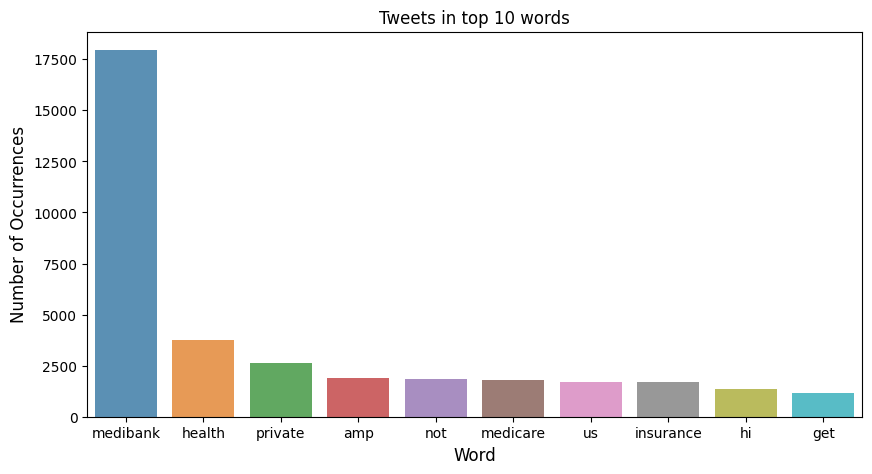

In [ ]:
# Visualize the top word counts

word_count  = word_frequency
word_count = word_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(x=word_count.index, y=word_count.values, alpha=0.8)
plt.title('Tweets in top 10 words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

### Top 10 Rare Words

In [ ]:
# least common words
word_frequency[-10:]  # get bottom 10

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


httpstco7jccpjzlpu    1
corgis                1
httpstcowqzgqv9lox    1
tyrannosros           1
aud3kyr               1
aud256month           1
nymilitant            1
herbert59321608       1
danmcguigan123        1
kkppi                 1
dtype: int64

In [ ]:
from wordcloud import WordCloud

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


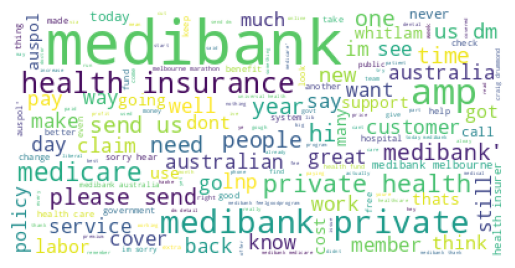

In [ ]:
##########
corpus = list(df_medibank['tweet'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()